<a href="https://colab.research.google.com/github/SimeonHristov99/ML_21-22/blob/main/07_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Constants

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, log_loss

# Load in data

In [2]:
!wget https://raw.githubusercontent.com/SimeonHristov99/knowledge_based_systems/main/session2/drug200.csv

--2022-04-07 13:43:38--  https://raw.githubusercontent.com/SimeonHristov99/knowledge_based_systems/main/session2/drug200.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5827 (5.7K) [text/plain]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.69K  --.-KB/s    in 0s      

2022-04-07 13:43:39 (62.5 MB/s) - ‘drug200.csv’ saved [5827/5827]



In [3]:
df = pd.read_csv('./drug200.csv')

# Exploratory data analysis

In [4]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df["Drug"].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [7]:
df["BP"].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [8]:
df["Drug"].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

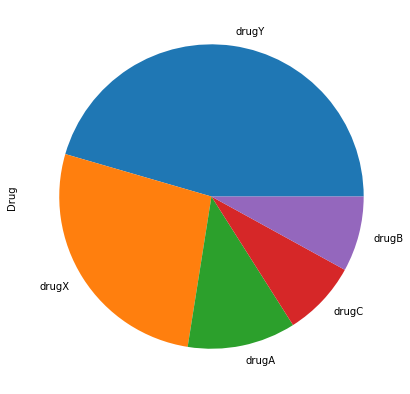

In [9]:
df["Drug"].value_counts().plot(kind='pie', figsize=(10, 7))

# Preprocess data

In [11]:
df[['BP']].head()

,BP
0,HIGH
1,LOW
2,LOW
3,NORMAL
4,LOW


In [10]:
encoder = OrdinalEncoder(categories=[['LOW', 'NORMAL', 'HIGH']])
encoder.fit_transform(df[['BP']])[:5]

array([[2.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [32]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [28]:
pd.get_dummies(df[['BP']])

,BP_HIGH,BP_LOW,BP_NORMAL
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
195,0,1,0
196,0,1,0
197,0,0,1
198,0,0,1


In [52]:
def preprocess_inputs(df):
  df = df.copy()

  # Binary encoding
  df['Sex'] = df['Sex'].replace({'F':1, 'M':0})
  df['Cholesterol'] = df['Cholesterol'].replace({'HIGH':1, 'NORMAL':0})
  
  # One-hot encoding
  dummies = pd.get_dummies(df['BP'], prefix='BP')
  df = df.drop(['BP'], axis=1)
  df = pd.concat([df, dummies], axis=1)

  # Ordinal encoding
  # encoder = OrdinalEncoder(categories=[['LOW', 'NORMAL', 'HIGH']])
  # df[['BP']] = encoder.fit_transform(df[['BP']])

  # Split into X and y
  y = df['Drug']
  X = df.drop(['Drug'], axis=1)

  # Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Scale values
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
  X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

  return X_train, X_test, y_train, y_test

In [53]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [54]:
X_train

,Age,Sex,Cholesterol,Na_to_K,BP_HIGH,BP_LOW,BP_NORMAL
169,-1.590463,1.089725,0.891556,-0.685430,1.206706,-0.643538,-0.654654
97,0.625107,1.089725,0.891556,1.368661,1.206706,-0.643538,-0.654654
31,1.732893,-0.917663,0.891556,-0.931781,1.206706,-0.643538,-0.654654
12,-0.174960,-0.917663,0.891556,-0.087501,-0.828702,1.553909,-0.654654
35,0.009671,-0.917663,-1.121635,-1.263447,-0.828702,-0.643538,1.527525
...,...,...,...,...,...,...,...
106,-1.467376,-0.917663,0.891556,-0.585000,-0.828702,-0.643538,1.527525
14,0.255846,1.089725,0.891556,-0.475995,-0.828702,-0.643538,1.527525
92,-1.036571,1.089725,0.891556,1.958014,1.206706,-0.643538,-0.654654
179,1.302087,1.089725,0.891556,-0.012651,-0.828702,-0.643538,1.527525


In [56]:
X_train.describe()

,Age,Sex,Cholesterol,Na_to_K,BP_HIGH,BP_LOW,BP_NORMAL
count,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02
mean,6.819941e-17,1.141944e-16,-1.586033e-18,-4.218847e-16,-2.299748e-16,-2.157005e-16,2.696256e-17
std,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00
min,-1.898181e+00,-9.176629e-01,-1.121635e+00,-1.350942e+00,-8.287020e-01,-6.435382e-01,-6.546537e-01
25%,-8.519397e-01,-9.176629e-01,-1.121635e+00,-7.941077e-01,-8.287020e-01,-6.435382e-01,-6.546537e-01
50%,7.121477e-02,-9.176629e-01,8.915558e-01,-2.880701e-01,-8.287020e-01,-6.435382e-01,-6.546537e-01
75%,8.712819e-01,1.089725e+00,8.915558e-01,4.784167e-01,1.206706e+00,1.553909e+00,1.527525e+00
max,1.732893e+00,1.089725e+00,8.915558e-01,3.082655e+00,1.206706e+00,1.553909e+00,1.527525e+00


In [57]:
y_train

169    drugA
97     drugY
31     drugB
12     drugY
35     drugX
       ...  
106    drugX
14     drugX
92     drugY
179    drugY
102    drugC
Name: Drug, Length: 140, dtype: object

# Build a model

**KNN**

In [58]:
best_model = None
best_score = -1
scores = {}

# Grid search!
for neighs in range(1, 30):
  model = KNeighborsClassifier(neighs)
  model.fit(X_train, y_train)

  score = model.score(X_test, y_test)

  if score > best_score:
    best_score = score
    best_model = model
  
  scores[str(neighs)] = score

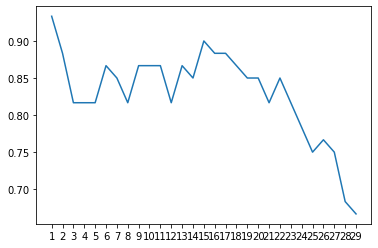

In [59]:
plt.plot(list(scores.keys()), list(scores.values()))
plt.show()

In [60]:
best_model, best_score

(KNeighborsClassifier(n_neighbors=1), 0.9333333333333333)

In [61]:
# Classification report
y_pred = best_model.predict(X_test)
target_names = y_test.unique()
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       drugX       1.00      0.86      0.92         7
       drugY       0.60      1.00      0.75         3
       drugC       1.00      1.00      1.00         6
       drugA       1.00      0.94      0.97        18
       drugB       0.92      0.92      0.92        26

    accuracy                           0.93        60
   macro avg       0.90      0.94      0.91        60
weighted avg       0.95      0.93      0.94        60



In [63]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 6,  0,  0,  0,  1],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 17,  1],
       [ 0,  2,  0,  0, 24]])

# Build a model

**Logistic Regression**

In [64]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.95

In [65]:
# Classification report
y_pred = model.predict(X_test)
target_names = y_test.unique()
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       drugX       1.00      1.00      1.00         7
       drugY       0.60      1.00      0.75         3
       drugC       1.00      1.00      1.00         6
       drugA       0.95      1.00      0.97        18
       drugB       1.00      0.88      0.94        26

    accuracy                           0.95        60
   macro avg       0.91      0.98      0.93        60
weighted avg       0.96      0.95      0.95        60



In [66]:
log_loss(y_train, model.predict_proba(X_train))

0.191922492867653

In [68]:
log_loss(y_test, model.predict_proba(X_test))

0.21034133350256884